In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('data.csv')

In [23]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [24]:
data.drop(columns='id',inplace=True)

In [25]:
data.drop(columns='Unnamed: 32',inplace=True)

### NUll Value Checking

In [26]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [27]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [28]:
data['diagnosis'] = data['diagnosis'].apply(lambda  x: 1 if x=='M' else 0)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [30]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## No Null Value Detected

## Now Check for Outliers 

In [31]:
# print("The length of data before outlier removal: {}".format(len(data)))
# 
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1
# data_1 = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
# 
# print("The length of data After outlier removal: {}".format(len(data_1))) 

No Need of OUtlier Removing because of good prediction

In [32]:
# data = data_1

In [33]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### EDA Perform

In [34]:
#sns.pairplot(data)

<Axes: >

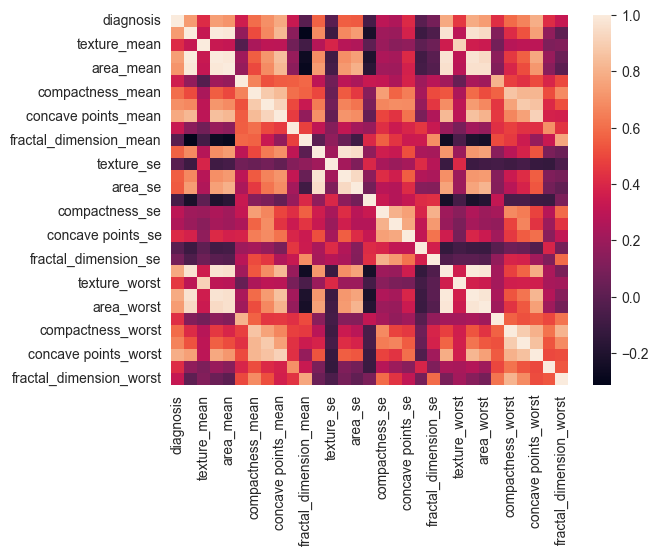

In [35]:
sns.heatmap(data.corr())

# Model

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
X = data.drop(columns='diagnosis')
y = data['diagnosis']

In [38]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=34,test_size=0.2)

## Logistic Regreesion

In [40]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(f1_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.9473684210526315
0.9473684210526315
0.9649122807017544
0.9473684210526315


F:\Machine learning python\ML Advance alogrithms\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random forest Classifier

In [41]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.9333333333333332
0.956140350877193
0.9459459459459459
0.9210526315789473


## Extra Tree Cassifier

In [42]:
ef = ExtraTreesClassifier()
ef.fit(X_train,y_train)
y_pred  = ef.predict(X_test)
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.9473684210526315
0.9649122807017544
0.9473684210526315
0.9473684210526315


## Gradient Boost 

In [43]:
gb  = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.9333333333333332
0.956140350877193
0.9459459459459459
0.9210526315789473


## Bagging Cassifier

In [44]:
bc = BaggingClassifier()
bc.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.9333333333333332
0.956140350877193
0.9459459459459459
0.9210526315789473


## Decision Tree Clasifier

In [45]:
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
y_pred = dc.predict(X_test)
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.8918918918918918
0.9298245614035088
0.9166666666666666
0.868421052631579


## Here by observing some models Random forest , Extra tree and Logistic regression giving best Score 

# Final Model Dealing

## Random Forest

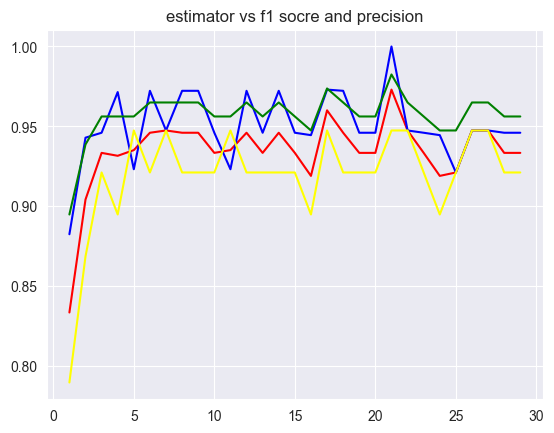

0.9824561403508771 21


In [54]:
f1 = []
pr = []
ac = []
re = []
estimator = np.arange(1,30)

for i in estimator:
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    f1.append(f1_score(y_test,y_pred))
    pr.append(precision_score(y_test,y_pred))
    ac.append(accuracy_score(y_test,y_pred))
    re.append(recall_score(y_test,y_pred))
    
plt.plot(estimator,f1,color='red')
plt.plot(estimator,pr,color = 'blue')
plt.plot(estimator,ac,color = 'green')
plt.plot(estimator,re,color = 'yellow')
plt.title("estimator vs f1 socre and precision")
plt.show()

max_acc_index = np.argmax(ac)
n_estimator = estimator[max_acc_index]
max_acc = ac[max_acc_index]
print(max_acc,n_estimator)

## Cross Validation Test

In [55]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')

print("Cross-validated F1-Scores:", cv_scores)
print("Mean F1-Score:", cv_scores.mean())
print("Standard Deviation of F1-Scores:", cv_scores.std())

Cross-validated F1-Scores: [0.90697674 0.9        0.97619048 0.95121951 0.96385542]
Mean F1-Score: 0.9396484308516783
Standard Deviation of F1-Scores: 0.030641888273623047


## Extraa Tree

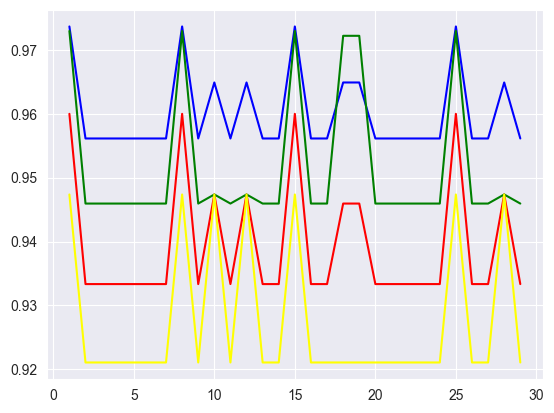

0.9736842105263158 1


In [57]:
f1 = []
ac = []
pr = []
re = []

estimator = np.arange(1,30)

for i in estimator:
    model1 = ExtraTreesClassifier()
    model1.fit(X_train,y_train)
    y_pred = model1.predict(X_test)
    f1.append(f1_score(y_test,y_pred))
    pr.append(precision_score(y_test,y_pred))
    ac.append(accuracy_score(y_test,y_pred))
    re.append(recall_score(y_test,y_pred))

plt.plot(estimator,f1,color='red')
plt.plot(estimator,ac,color='blue')
plt.plot(estimator,pr,color='green')
plt.plot(estimator,re,color='yellow')
plt.show()

max_acc_index = np.argmax(ac)
n_estimator = estimator[max_acc_index]
max_acc = ac[max_acc_index]
print(max_acc,n_estimator)

## Cross val test

In [58]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1')

print("Cross-validated F1-Scores:", cv_scores)
print("Mean F1-Score:", cv_scores.mean())
print("Standard Deviation of F1-Scores:", cv_scores.std())

Cross-validated F1-Scores: [0.86363636 0.93975904 0.97619048 0.95       0.97619048]
Mean F1-Score: 0.9411552704323789
Standard Deviation of F1-Scores: 0.04133833791333296


## Feature Selection

In [86]:
feature_imp = pd.Series(model.feature_importances_).sort_values(ascending=False)

In [87]:
feature_imp

23    0.235418
7     0.123766
20    0.111815
27    0.102509
22    0.059812
26    0.054072
2     0.046449
13    0.044976
0     0.041828
6     0.035724
21    0.029002
25    0.016805
3     0.009982
24    0.009907
1     0.008965
11    0.008738
28    0.007989
5     0.006809
19    0.006746
17    0.006123
15    0.005349
4     0.004869
10    0.004283
29    0.003038
9     0.002827
12    0.002738
18    0.002679
8     0.002419
16    0.002205
14    0.002156
dtype: float64

In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

# Model

In [96]:
X = data[['area_worst','concave points_mean','radius_worst','perimeter_worst','concavity_worst','perimeter_mean']]
y = data['diagnosis']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=55,test_size=0.2)
model = RandomForestClassifier(n_estimators=21)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f1_score(y_test,y_pred))

0.9494949494949495


In [97]:
cv_scores = cross_val_score(model,X,y,cv=10,scoring='f1')
print("Cross-validated F1-Scores:", cv_scores)
print("Mean F1-Score:", cv_scores.mean())
print("Standard Deviation of F1-Scores:", cv_scores.std())

Cross-validated F1-Scores: [0.92682927 0.84444444 0.85       0.89473684 0.97560976 0.95454545
 0.9047619  0.95238095 0.93023256 1.        ]
Mean F1-Score: 0.9233541180767798
Standard Deviation of F1-Scores: 0.048220608892309384


In [98]:
import pickle
pickle.dump(model,open('model.pkl','wb'))